# Final Project Submission

Please fill out:
* Student name: Elizabeth Webster
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1">Final Project Submission</a></span></li><li><span><a href="#Overview" data-toc-modified-id="Overview-2">Overview</a></span></li><li><span><a href="#Business-Problem-and-Stakeholders" data-toc-modified-id="Business-Problem-and-Stakeholders-3">Business Problem and Stakeholders</a></span></li><li><span><a href="#Importing-and-Understanding-the-Data" data-toc-modified-id="Importing-and-Understanding-the-Data-4">Importing and Understanding the Data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-5">Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Find-and-Fill-Missing-Data" data-toc-modified-id="Find-and-Fill-Missing-Data-5.1">Find and Fill Missing Data</a></span><ul class="toc-item"><li><span><a href="#Waterfront" data-toc-modified-id="Waterfront-5.1.1">Waterfront</a></span></li><li><span><a href="#Year-Renovated" data-toc-modified-id="Year-Renovated-5.1.2">Year Renovated</a></span></li></ul></li><li><span><a href="#Explore-Target-Variable" data-toc-modified-id="Explore-Target-Variable-5.2">Explore Target Variable</a></span></li><li><span><a href="#Change-Categorical-to-Numeric-Values" data-toc-modified-id="Change-Categorical-to-Numeric-Values-5.3">Change Categorical to Numeric Values</a></span><ul class="toc-item"><li><span><a href="#Waterfront" data-toc-modified-id="Waterfront-5.3.1">Waterfront</a></span></li><li><span><a href="#Grade" data-toc-modified-id="Grade-5.3.2">Grade</a></span></li><li><span><a href="#Condition" data-toc-modified-id="Condition-5.3.3">Condition</a></span></li><li><span><a href="#Zipcode" data-toc-modified-id="Zipcode-5.3.4">Zipcode</a></span></li></ul></li><li><span><a href="#House-Age" data-toc-modified-id="House-Age-5.4">House Age</a></span></li></ul></li><li><span><a href="#Creating-Models" data-toc-modified-id="Creating-Models-6">Creating Models</a></span><ul class="toc-item"><li><span><a href="#Create-a-Baseline-Model" data-toc-modified-id="Create-a-Baseline-Model-6.1">Create a Baseline Model</a></span></li><li><span><a href="#Second-Model" data-toc-modified-id="Second-Model-6.2">Second Model</a></span></li><li><span><a href="#Third-Model" data-toc-modified-id="Third-Model-6.3">Third Model</a></span><ul class="toc-item"><li><span><a href="#Multicolinearity" data-toc-modified-id="Multicolinearity-6.3.1">Multicolinearity</a></span></li><li><span><a href="#Checking-for-Normal-Distribution" data-toc-modified-id="Checking-for-Normal-Distribution-6.3.2">Checking for Normal Distribution</a></span></li><li><span><a href="#Create-a-New-Model" data-toc-modified-id="Create-a-New-Model-6.3.3">Create a New Model</a></span></li></ul></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-6.4">Final Model</a></span></li></ul></li><li><span><a href="#Create-Functions-for-and-Check-Assumptions" data-toc-modified-id="Create-Functions-for-and-Check-Assumptions-7">Create Functions for and Check Assumptions</a></span><ul class="toc-item"><li><span><a href="#Linearity" data-toc-modified-id="Linearity-7.1">Linearity</a></span></li><li><span><a href="#Multicolinearity" data-toc-modified-id="Multicolinearity-7.2">Multicolinearity</a></span></li><li><span><a href="#Normality" data-toc-modified-id="Normality-7.3">Normality</a></span></li><li><span><a href="#Homoscedasticity" data-toc-modified-id="Homoscedasticity-7.4">Homoscedasticity</a></span></li></ul></li><li><span><a href="#Interpreting-the-Coefficients" data-toc-modified-id="Interpreting-the-Coefficients-8">Interpreting the Coefficients</a></span><ul class="toc-item"><li><span><a href="#Log-Transformation-Effects-on-Coefficients" data-toc-modified-id="Log-Transformation-Effects-on-Coefficients-8.1">Log Transformation Effects on Coefficients</a></span></li><li><span><a href="#Zipcodes" data-toc-modified-id="Zipcodes-8.2">Zipcodes</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9">Conclusion</a></span><ul class="toc-item"><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-9.1">Next Steps</a></span></li></ul></li></ul></div>

# Overview

This project uses linear regression analysis to understand how certain variables impact housing prices in King County. We will be building different models in order to create the most accurate coefficients and the highest R-squared value.

# Business Problem and Stakeholders

This data is being prepared for a Real Estate group in King County that wants to understand how zipcodes affect the price of houses.  They are hoping to use this information to help potential buyers find a home in their price range by narrowing down the neighborhoods in which to search. 

# Importing and Understanding the Data

In [151]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [152]:
# Import raw data from csv file
raw_data = pd.read_csv('data/kc_house_data.csv')
raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [153]:
# Remove irrelevant data columns
irrelevant_data = ['view', 'id', 'sqft_above', 'sqft_basement',
                   'lat', 'long', 'sqft_living15', 'sqft_lot15']
df = raw_data.drop(irrelevant_data, axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955,0.0,98178
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,1991.0,98125
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,NaN,98028
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,0.0,98136
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,0.0,98074


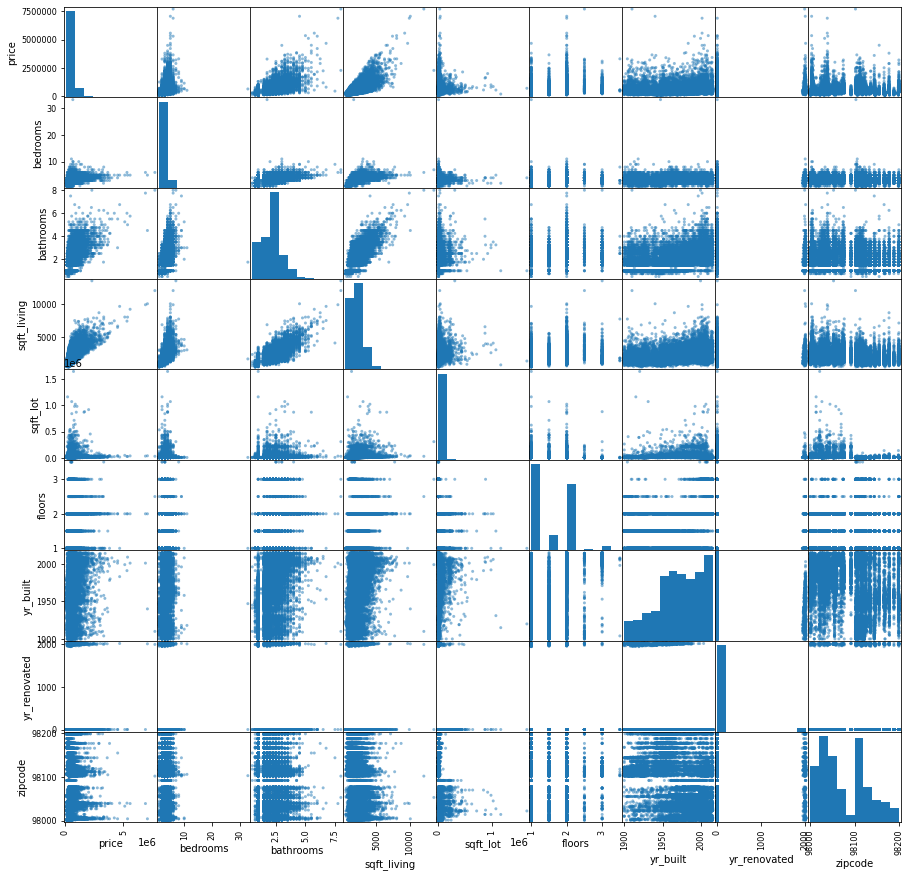

In [154]:
# Use a scatter matrix to explore interactions between variables
pd.plotting.scatter_matrix(df, figsize=(15,15));

In [155]:
# Explore relevant data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          21597 non-null  object 
 1   price         21597 non-null  float64
 2   bedrooms      21597 non-null  int64  
 3   bathrooms     21597 non-null  float64
 4   sqft_living   21597 non-null  int64  
 5   sqft_lot      21597 non-null  int64  
 6   floors        21597 non-null  float64
 7   waterfront    19221 non-null  object 
 8   condition     21597 non-null  object 
 9   grade         21597 non-null  object 
 10  yr_built      21597 non-null  int64  
 11  yr_renovated  17755 non-null  float64
 12  zipcode       21597 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 2.1+ MB


As we can see, there is some data filling and cleaning that needs to be done before we can use this data to create our multiple linear regression models.

# Data Cleaning

## Find and Fill Missing Data

In [156]:
# Find missing data in dataset
df.isna().sum()

date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2376
condition          0
grade              0
yr_built           0
yr_renovated    3842
zipcode            0
dtype: int64

There is missing data in 'waterfront' and 'yr_renovated'.

### Waterfront

In [157]:
# Check unique values in waterfront variable
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [158]:
# We will assume that a NaN value means there is no waterfront
# Fill the NaN values with 'NO'
df.waterfront.fillna('NO', inplace=True)

### Year Renovated

In [159]:
# Check unique values for year renovated
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [160]:
# We will assume that a NaN value means there has been no renovation
# Fill the NaN values with 0
df.yr_renovated.fillna(0, inplace=True)

In [161]:
# Check the value counts
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

Most of the houses in the dataset have not been renovated.  Instead of having the year for each renovation, we will created a new variable called 'renovated' that has a value of 0 for a house without renovations and a value of 1 for a renovated house.

In [162]:
# Create a column 'renovated' and set all values to 0
df['renovated'] = 0

In [163]:
# Change values to 1 for houses that have been renovated
df.loc[df['yr_renovated'] != 0, 'renovated'] = 1

In [164]:
# Check the value counts
df.renovated.value_counts()

0    20853
1      744
Name: renovated, dtype: int64

In [165]:
# Remove the variable 'yr_renovated'
df.drop('yr_renovated', axis=1, inplace=True)

In [166]:
# Check to make sure there are no more NaN values
df.isna().sum()

date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
zipcode        0
renovated      0
dtype: int64

Now that we have gotten rid of null values, lets look into our target variable, price.

## Explore Target Variable

In [167]:
# Look into the distribution of house prices
df.price.describe().round()

count      21597.0
mean      540297.0
std       367368.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

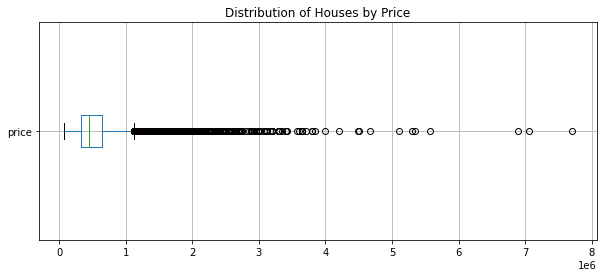

In [168]:
# Plot the distribution
fig, ax = plt.subplots(figsize = (10, 4))
df.boxplot('price', vert=False)
ax.set_title("Distribution of Houses by Price");

Looking at price, it seems as though we have some outliers in our dataset.  There is a huge jump from the third quartile to the maximum house price.  Lets look at how many houses have prices that are more than three standard deviations away from the mean.

In [169]:
# Set an upper limit
price_upper_limit = df.price.mean() + 3*df.price.std()

In [170]:
# How many houses are above the limit
number_of_outliers = (df.price>price_upper_limit).sum()
print('There are', number_of_outliers, 'outliers.')

There are 406 outliers.


There are 406 price outliers.  Because this number is so small in comparison to our dataset (21597 entries), I believe we should drop this data.

In [171]:
# Drop outlier data
df_updated = df.loc[df.price<=price_upper_limit]

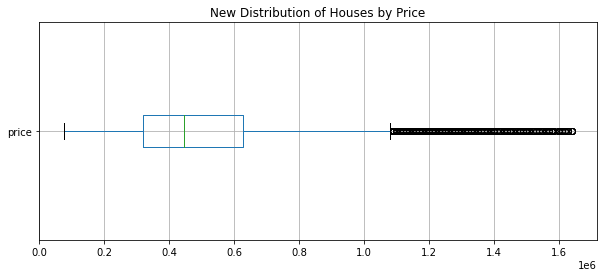

In [172]:
# Check new distribution of price data
fig, ax = plt.subplots(figsize = (10, 4))
df_updated.boxplot('price', vert=False)
ax.set_title("New Distribution of Houses by Price");

This distribution still looks skewed, but not as dramatically as it was.

## Change Categorical to Numeric Values

Now that we have our base data, lets focus on getting all of our variables into numeric values.

In [173]:
# Find our categorical data
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21191 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         21191 non-null  object 
 1   price        21191 non-null  float64
 2   bedrooms     21191 non-null  int64  
 3   bathrooms    21191 non-null  float64
 4   sqft_living  21191 non-null  int64  
 5   sqft_lot     21191 non-null  int64  
 6   floors       21191 non-null  float64
 7   waterfront   21191 non-null  object 
 8   condition    21191 non-null  object 
 9   grade        21191 non-null  object 
 10  yr_built     21191 non-null  int64  
 11  zipcode      21191 non-null  int64  
 12  renovated    21191 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 2.3+ MB


We have four variables that need to be changed from categorical data to numeric data: waterfront, condition, grade, and zipcode. We will address date later on.

### Waterfront

In [174]:
# Check values in waterfront
df_updated.waterfront.value_counts()

NO     21111
YES       80
Name: waterfront, dtype: int64

In [175]:
# Create dummies for waterfront
waterfront_dummies = pd.get_dummies(df_updated.waterfront, 
                                    drop_first=True, 
                                    prefix='waterfront')
df_updated.drop('waterfront', axis=1, inplace=True)
df_updated = pd.concat([df_updated, waterfront_dummies], axis=1)

In [176]:
df_updated.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,renovated,waterfront_YES
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1955,98178,0,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,1951,98125,1,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,1933,98028,0,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1965,98136,0,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1987,98074,0,0


### Grade

In [177]:
# Check the categories in grade
df_updated.grade.value_counts()

7 Average        8972
8 Good           6047
9 Better         2552
6 Low Average    2038
10 Very Good      997
11 Excellent      283
5 Fair            242
12 Luxury          32
4 Low              27
3 Poor              1
Name: grade, dtype: int64

In [178]:
# Split the values in the grade column and keep only the number
df_updated.grade = [grade[0] for grade in df_updated.grade.str.split()]

In [179]:
# Convert the number string into an integer
df_updated.grade = df_updated.grade.astype(int)

In [180]:
# Check to make sure grade has a dtype of int64
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21191 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            21191 non-null  object 
 1   price           21191 non-null  float64
 2   bedrooms        21191 non-null  int64  
 3   bathrooms       21191 non-null  float64
 4   sqft_living     21191 non-null  int64  
 5   sqft_lot        21191 non-null  int64  
 6   floors          21191 non-null  float64
 7   condition       21191 non-null  object 
 8   grade           21191 non-null  int64  
 9   yr_built        21191 non-null  int64  
 10  zipcode         21191 non-null  int64  
 11  renovated       21191 non-null  int64  
 12  waterfront_YES  21191 non-null  uint8  
dtypes: float64(3), int64(7), object(2), uint8(1)
memory usage: 2.1+ MB


### Condition

In [181]:
# Check the categories in condition
df_updated.condition.value_counts()

Average      13765
Good          5582
Very Good     1646
Fair           169
Poor            29
Name: condition, dtype: int64

In [182]:
# use dummies to create new columns for each category in condition
condition_dummies = pd.get_dummies(df_updated.condition, 
                                   drop_first=True, 
                                   prefix='condition')
df_updated.drop('condition', axis=1, inplace=True)
df_updated = pd.concat([df_updated, condition_dummies], axis=1)

In [183]:
# Rename the Very Good column for future usability
df_updated.rename(columns={'condition_Very Good':'condition_Very_Good'}, 
                  inplace=True)

### Zipcode

Although this data seems to be numeric, zipcodes are actually categories, so we will create dummies for this variable as well.

In [184]:
# Create zipcode dummies
zipcode_dummies = pd.get_dummies(df_updated.zipcode, 
                                   drop_first=True, 
                                   prefix='zipcode')
df_updated.drop('zipcode', axis=1, inplace=True)
df_updated = pd.concat([df_updated, zipcode_dummies], axis=1)

In [185]:
# Check our dataframe
df_updated.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,7,1955,0,...,0,0,0,0,0,0,1,0,0,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,7,1951,1,...,0,0,0,0,0,0,0,0,0,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,6,1933,0,...,0,0,0,0,0,0,0,0,0,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,7,1965,0,...,0,0,0,0,0,0,0,0,0,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,8,1987,0,...,0,0,0,0,0,0,0,0,0,0


All of this data is now in numeric form and will be easier to work with.

## House Age

Instead of two separate categories, year built and date, lets combine the two to find the age of the house when it was sold.

In [186]:
# First we will have to change 'date' to reflect only the year.
df_updated.date = [date[2] for date in df_updated.date.str.split('/')]

In [187]:
# Change date to int64
df_updated.date = df_updated.date.astype(int)

Create age column by subtracting the year built from the date.

In [188]:
df_updated['age'] = df_updated['date'] - df_updated['yr_built']

In [189]:
# Remove date and yr_built
df_preprocessed = df_updated.drop(['date', 'yr_built'], axis=1)

In [190]:
# Remove data with a negative age
df_preprocessed = df_preprocessed.loc[df_preprocessed.age >= 0]

In [191]:
# Check to make sure all of our data has numeric values
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21179 entries, 0 to 21596
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21179 non-null  float64
 1   bedrooms             21179 non-null  int64  
 2   bathrooms            21179 non-null  float64
 3   sqft_living          21179 non-null  int64  
 4   sqft_lot             21179 non-null  int64  
 5   floors               21179 non-null  float64
 6   grade                21179 non-null  int64  
 7   renovated            21179 non-null  int64  
 8   waterfront_YES       21179 non-null  uint8  
 9   condition_Fair       21179 non-null  uint8  
 10  condition_Good       21179 non-null  uint8  
 11  condition_Poor       21179 non-null  uint8  
 12  condition_Very_Good  21179 non-null  uint8  
 13  zipcode_98002        21179 non-null  uint8  
 14  zipcode_98003        21179 non-null  uint8  
 15  zipcode_98004        21179 non-null 

All of our variable values are now numeric and are ready to be used in our linear regression models.

# Creating Models

## Create a Baseline Model

Now that we have cleaned our data, we can create a baseline dataframe.

In [192]:
# Find the two variables that are most highly correlated with price
# We will use only variables that we did not create dummies for
preds = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 
         'renovated', 'age']
predictors = df_preprocessed[preds]
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(predictors, df_preprocessed['price'])

In [193]:
predictors.columns[selector.support_]

Index(['grade', 'renovated'], dtype='object')

Create a baseline dataframe with price and the two highest correlated variables.

In [194]:
baseline_df = df_preprocessed[['grade', 'renovated', 'price']]

In [195]:
baseline_df

,grade,renovated,price
0,7,0,221900.0
1,7,1,538000.0
2,6,0,180000.0
3,7,0,604000.0
4,8,0,510000.0
...,...,...,...
21592,8,0,360000.0
21593,8,0,400000.0
21594,7,0,402101.0
21595,8,0,400000.0


Create a function that returns a multiple linear regression model and plug in our baseline dataframe.

In [196]:
# Create our model function
def model(data):
    outcome = 'price'
    predictors = data.drop('price', axis=1)
    pred_sum = '+'.join(predictors.columns)
    formula = outcome + '~' + pred_sum
    model = ols(formula=formula, data = data).fit()
    return model

In [197]:
baseline_model = model(baseline_df)

In [198]:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     9114.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:50:17   Log-Likelihood:            -2.8750e+05
No. Observations:               21179   AIC:                         5.750e+05
Df Residuals:                   21176   BIC:                         5.750e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.954e+05   9065.349    -76.706      0.000   -7.13e+05   -6.78e+05
grade       1.575e+05   1179.148    133.556      0.000    1.55e+05     1.6e+05
renovated   1.461e+05   7348.483     19.881      0.000    1.32e+05     1.6e+05
==============================================================================
Omnibus:                     3842.325   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8350.573
Skew:                           1.061   Prob(JB):                         0.00
Kurtosis:                       5.227   Cond. No.                         54.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This baseline model has an R-squared value of .463, meaning that our highly correlated variables can explain 46% of price. This R-squared is not very high, so we will want to add in more variables to increase this value.

## Second Model

For our second model, lets look at all of our variables before they have been transformed or manipulated at all.

In [199]:
# Create a model with the dataframe that includes all our variables
model_2 = model(df_preprocessed)

In [200]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1173.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:50:18   Log-Likelihood:            -2.7591e+05
No. Observations:               21179   AIC:                         5.520e+05
Df Residuals:                   21096   BIC:                         5.527e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.982e+05   1.05e+04    -47.581      0.000   -5.19e+05   -4.78e+05
bedrooms            -1.277e+04   1075.342    -11.876      0.000   -1.49e+04   -1.07e+04
bathrooms            1.233e+04   1832.489      6.729      0.000    8738.796    1.59e+04
sqft_living           133.5021      1.836     72.721      0.000     129.904     137.100
sqft_lot                0.2854      0.021     13.805      0.000       0.245       0.326
floors              -4061.1075   1927.948     -2.106      0.035   -7840.032    -282.183
grade                 6.99e+04   1206.545     57.934      0.000    6.75e+04    7.23e+04
renovated            3.373e+04   4525.140      7.455      0.000    2.49e+04    4.26e+04
waterfront_YES       4.002e+05   1.28e+04     31.323      0.000    3.75e+05    4.25e+05
condition_Fair      -1.128e+04   8643.645     -1.305      0.192   -2.82e+04    5660.538
condition_Good       1.531e+04   1968.320      7.776      0.000    1.14e+04    1.92e+04
condition_Poor       -2.69e+04   2.06e+04     -1.303      0.192   -6.73e+04    1.35e+04
condition_Very_Good   4.95e+04   3125.875     15.837      0.000    4.34e+04    5.56e+04
zipcode_98002         1.57e+04   9762.294      1.608      0.108   -3435.071    3.48e+04
zipcode_98003        -1.12e+04   8793.844     -1.273      0.203   -2.84e+04    6040.384
zipcode_98004        6.064e+05   9371.595     64.709      0.000    5.88e+05    6.25e+05
zipcode_98005        3.093e+05   1.05e+04     29.475      0.000    2.89e+05     3.3e+05
zipcode_98006        2.803e+05   7838.753     35.762      0.000    2.65e+05    2.96e+05
zipcode_98007        2.432e+05    1.1e+04     22.119      0.000    2.22e+05    2.65e+05
zipcode_98008        2.476e+05   8861.647     27.941      0.000     2.3e+05    2.65e+05
zipcode_98010        8.261e+04   1.25e+04      6.607      0.000    5.81e+04    1.07e+05
zipcode_98011        1.319e+05   9813.473     13.441      0.000    1.13e+05    1.51e+05
zipcode_98014          1.1e+05   1.16e+04      9.441      0.000    8.71e+04    1.33e+05
zipcode_98019        9.671e+04   9915.142      9.754      0.000    7.73e+04    1.16e+05
zipcode_98022         1.53e+04   9363.469      1.634      0.102   -3052.081    3.37e+04
zipcode_98023       -2.925e+04   7632.606     -3.833      0.000   -4.42e+04   -1.43e+04
zipcode_98024         1.63e+05   1.39e+04     11.701      0.000    1.36e+05     1.9e+05
zipcode_98027        1.757e+05   8015.965     21.920      0.000     1.6e+05    1.91e+05
zipcode_98028        1.268e+05   8765.196     14.469      0.000     1.1e+05    1.44e+05
zipcode_98029        2.136e+05   8548.812     24.984      0.000    1.97e+05     2.3e+05
zipcode_98030        4580.4170   9012.913      0.508      0.611   -1.31e+04    2.22e+04
zipcode_98031        8615.4372   8851.459      0.973      0.330   -8734.099     2.6e+04
zip

We have increased our R-squared value from .463 to .820 by adding in more variables. Next, we will see if we can create a more accurate model by transforming and normalizing our data.

## Third Model

To create our third model, we will remove variables with multicolinearity, perform log transformations, and normalize our data.

### Multicolinearity

We will first look at which variables are highly correlated with one another.

In [201]:
# Create a function that shows which variables have a correlation 
# of .7 or higher
def multicolinearity(data):
    pred = data.drop('price', axis=1)
    df = pred.corr().abs().stack().reset_index().sort_values(0, 
                                                             ascending=False)
    df['pairs'] = list(zip(df.level_0, df.level_1))
    df.set_index(['pairs'], inplace=True)
    df.drop(columns=['level_0', 'level_1'], inplace=True)
    df.columns = ['cc']
    df.drop_duplicates(inplace=True)
    return df[(df.cc > .7)&(df.cc < 1)]

In [202]:
# Explore variable correlation in our second model dataframe
multicolinearity(df_preprocessed)

,cc
pairs,
"(grade, sqft_living)",0.738344
"(bathrooms, sqft_living)",0.735551


Based on this function, 'sqft_living' has a correlation greater than .7 with both 'grade' and 'bathrooms'.  Instead of removing both grade and bathrooms, I believe we should remove sqft_living from our model.

In [203]:
df_preprocessed.drop('sqft_living', axis=1, inplace=True)

### Checking for Normal Distribution

Next, we will be looking at the distribution of our continuous variables.  We only have two true continuous variables in this dataset: price and sqft_lot.

In [204]:
# Define continuous and discrete variables
continuous = ['price', 'sqft_lot']
df_cont = df_preprocessed[continuous]
df_discrete = df_preprocessed.drop(['price', 'sqft_lot'], axis=1)

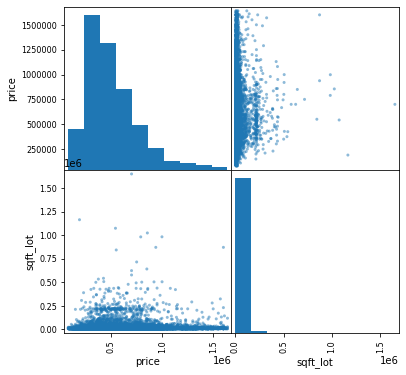

In [205]:
# Check for normal distribution
pd.plotting.scatter_matrix(df_cont, figsize=(6, 6));

Neither of these variables seem to follow a normal distribution, so we will perform log transformations on them.

In [206]:
# Log transformations
log_names = [f'{column}_log' for column in df_cont.columns]
df_cont_log = np.log(df_cont)
df_cont_log.columns = log_names

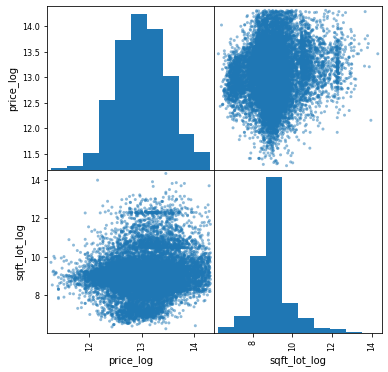

In [207]:
# Recheck distributions
pd.plotting.scatter_matrix(df_cont_log, figsize=(6, 6));

This data now follows more of a normal distribution.

In [208]:
# Rebuild our dataframe with log values for the continuous variables
df_transformed = pd.concat([df_cont_log, df_discrete], axis=1)

### Create a New Model

In [230]:
# Rename the price_log column so the dataframe will perform accurately 
# with our model function
df_transformed.rename(columns = {'price_log':'price'}, inplace=True)

In [231]:
# Create new model
model_3 = model(df_transformed)

In [232]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1218.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:52:03   Log-Likelihood:                 3695.4
No. Observations:               21179   AIC:                            -7227.
Df Residuals:                   21097   BIC:                            -6574.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.7910      0.024    410.183      0.000       9.744       9.838
sqft_lot_log            0.1025      0.002     45.392      0.000       0.098       0.107
bedrooms                0.0350      0.002     18.923      0.000       0.031       0.039
bathrooms               0.1248      0.003     40.941      0.000       0.119       0.131
floors                  0.0296      0.004      8.109      0.000       0.022       0.037
grade                   0.1762      0.002     90.965      0.000       0.172       0.180
renovated               0.0515      0.008      6.159      0.000       0.035       0.068
waterfront_YES          0.6128      0.024     25.971      0.000       0.567       0.659
condition_Fair         -0.1606      0.016    -10.059      0.000      -0.192      -0.129
condition_Good          0.0370      0.004     10.185      0.000       0.030       0.044
condition_Poor         -0.2410      0.038     -6.322      0.000      -0.316      -0.166
condition_Very_Good     0.0956      0.006     16.551      0.000       0.084       0.107
zipcode_98002          -0.0133      0.018     -0.738      0.460      -0.049       0.022
zipcode_98003           0.0095      0.016      0.586      0.558      -0.022       0.041
zipcode_98004           1.1015      0.017     63.570      0.000       1.068       1.135
zipcode_98005           0.7275      0.019     37.538      0.000       0.690       0.765
zipcode_98006           0.6661      0.014     45.972      0.000       0.638       0.695
zipcode_98007           0.6310      0.020     31.050      0.000       0.591       0.671
zipcode_98008           0.6630      0.016     40.429      0.000       0.631       0.695
zipcode_98010           0.2309      0.023      9.988      0.000       0.186       0.276
zipcode_98011           0.4760      0.018     26.257      0.000       0.440       0.512
zipcode_98014           0.2756      0.021     12.839      0.000       0.234       0.318
zipcode_98019           0.3324      0.018     18.154      0.000       0.297       0.368
zipcode_98022           0.0506      0.017      2.940      0.003       0.017       0.084
zipcode_98023          -0.0264      0.014     -1.870      0.062      -0.054       0.001
zipcode_98024           0.3779      0.026     14.678      0.000       0.327       0.428
zipcode_98027           0.5200      0.015     35.151      0.000       0.491       0.549
zipcode_98028           0.4368      0.016     26.975      0.000       0.405       0.469
zipcode_98029           0.6027      0.016     38.056      0.000       0.572       0.634
zipcode_98030           0.0579      0.017      3.480      0.001       0.025       0.091
zipcode_98031           0.0661      0.016      4.044      0.000       0.034       0.098
zipcode_98032          -0.0425      0.021     -2.009      0.045      -0.084      -0.001
zip

For this model, we have slightly improved our R-squared value from .820 to .824.  We do have 4 zipcode variables with p-values higher than .05: 98002, 98003, 98023, and 98092.  We will remove them from our final model.

## Final Model

In [215]:
# Removing high p-value variables
df_final = df_transformed.drop(['zipcode_98002', 'zipcode_98003', 
                                'zipcode_98023', 'zipcode_98092'], axis=1)

In [216]:
# Create final model
final_model = model(df_final)

In [217]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1280.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:50:19   Log-Likelihood:                 3687.6
No. Observations:               21179   AIC:                            -7219.
Df Residuals:                   21101   BIC:                            -6598.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.7830      0.022    450.079      0.000       9.740       9.826
sqft_lot_log            0.1032      0.002     45.911      0.000       0.099       0.108
bedrooms                0.0350      0.002     18.888      0.000       0.031       0.039
bathrooms               0.1246      0.003     40.893      0.000       0.119       0.131
floors                  0.0302      0.004      8.289      0.000       0.023       0.037
grade                   0.1761      0.002     91.177      0.000       0.172       0.180
renovated               0.0516      0.008      6.179      0.000       0.035       0.068
waterfront_YES          0.6117      0.024     25.918      0.000       0.565       0.658
condition_Fair         -0.1612      0.016    -10.094      0.000      -0.192      -0.130
condition_Good          0.0368      0.004     10.127      0.000       0.030       0.044
condition_Poor         -0.2419      0.038     -6.345      0.000      -0.317      -0.167
condition_Very_Good     0.0957      0.006     16.581      0.000       0.084       0.107
zipcode_98004           1.1039      0.014     76.505      0.000       1.076       1.132
zipcode_98005           0.7298      0.017     43.343      0.000       0.697       0.763
zipcode_98006           0.6684      0.011     61.630      0.000       0.647       0.690
zipcode_98007           0.6334      0.018     35.346      0.000       0.598       0.669
zipcode_98008           0.6656      0.013     50.012      0.000       0.640       0.692
zipcode_98010           0.2324      0.021     11.008      0.000       0.191       0.274
zipcode_98011           0.4782      0.015     30.995      0.000       0.448       0.508
zipcode_98014           0.2769      0.019     14.339      0.000       0.239       0.315
zipcode_98019           0.3340      0.016     21.280      0.000       0.303       0.365
zipcode_98022           0.0524      0.014      3.642      0.000       0.024       0.081
zipcode_98024           0.3792      0.024     15.820      0.000       0.332       0.426
zipcode_98027           0.5220      0.011     46.120      0.000       0.500       0.544
zipcode_98028           0.4391      0.013     33.519      0.000       0.413       0.465
zipcode_98029           0.6049      0.013     47.902      0.000       0.580       0.630
zipcode_98030           0.0601      0.014      4.400      0.000       0.033       0.087
zipcode_98031           0.0684      0.013      5.143      0.000       0.042       0.094
zipcode_98032          -0.0400      0.019     -2.117      0.034      -0.077      -0.003
zipcode_98033           0.7959      0.011     70.768      0.000       0.774       0.818
zipcode_98034           0.5352      0.010     52.874      0.000       0.515       0.555
zipcode_98038           0.1947      0.010     19.803      0.000       0.175       0.214
zip

Our final model has an R-squared value of .824.

# Create Functions for and Check Assumptions

## Linearity

In [239]:
# Create a function for checking linearity
def linearity(data, model):
    X = data.drop('price', axis=1)
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                       random_state = 42)
    preds = model.predict(X_test)
    fig, ax = plt.subplots()
    fit_line = np.arange(y_test.min(), 15)
    ax.plot(fit_line, fit_line, label='Perfect Fit', color = 'red')
    ax.scatter(y_test, preds, alpha = .5)
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.legend

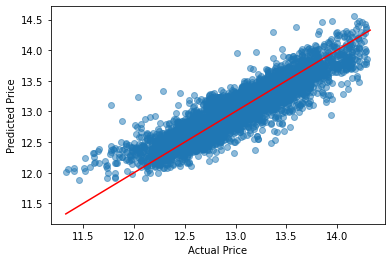

In [240]:
# Check linearity of our final dataset
linearity(df_final, final_model)

This model follows the linear assumption.

## Multicolinearity

In [220]:
# Check the dataset for highly correlated variables
multicolinearity(df_final)

,cc
pairs,


There are no values higher than .7

## Normality

In [221]:
# Create a function to check the normality of the model
def normality(model):
    fig = sm.graphics.qqplot(model.resid, 
                             dist=stats.norm, 
                             line='45', 
                             fit=True)

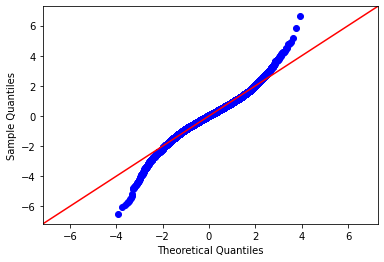

In [222]:
# Check the normality of our final model
normality(final_model)

We do have some outliers, but we can assume normality with this model.

## Homoscedasticity

In [241]:
# Create a function for checking homoscedasticity
def homoscedasticity(data, model):
    X = data.drop('price', axis=1)
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                       random_state = 42)
    preds = model.predict(X_test)
    residuals = (y_test - preds)
    fig, ax = plt.subplots()
    ax.scatter(preds, residuals, alpha=.5)
    ax.plot(preds, [0 for i in range(len(X_test))], color='red')
    ax.set_xlabel('Predicted Value')
    ax.set_ylabel('Actual Predicted Value')

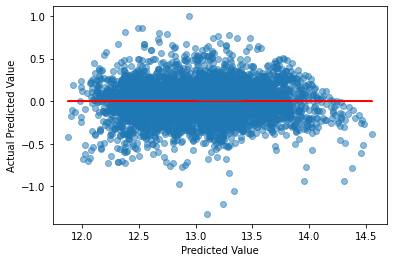

In [242]:
# Check for homoscedasticity
homoscedasticity(df_final, final_model)

This model does not violate the homoscedasticity assumption.

# Interpreting the Coefficients

In [243]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1280.
Date:                Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:02:50   Log-Likelihood:                 3687.6
No. Observations:               21179   AIC:                            -7219.
Df Residuals:                   21101   BIC:                            -6598.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.7830      0.022    450.079      0.000       9.740       9.826
sqft_lot_log            0.1032      0.002     45.911      0.000       0.099       0.108
bedrooms                0.0350      0.002     18.888      0.000       0.031       0.039
bathrooms               0.1246      0.003     40.893      0.000       0.119       0.131
floors                  0.0302      0.004      8.289      0.000       0.023       0.037
grade                   0.1761      0.002     91.177      0.000       0.172       0.180
renovated               0.0516      0.008      6.179      0.000       0.035       0.068
waterfront_YES          0.6117      0.024     25.918      0.000       0.565       0.658
condition_Fair         -0.1612      0.016    -10.094      0.000      -0.192      -0.130
condition_Good          0.0368      0.004     10.127      0.000       0.030       0.044
condition_Poor         -0.2419      0.038     -6.345      0.000      -0.317      -0.167
condition_Very_Good     0.0957      0.006     16.581      0.000       0.084       0.107
zipcode_98004           1.1039      0.014     76.505      0.000       1.076       1.132
zipcode_98005           0.7298      0.017     43.343      0.000       0.697       0.763
zipcode_98006           0.6684      0.011     61.630      0.000       0.647       0.690
zipcode_98007           0.6334      0.018     35.346      0.000       0.598       0.669
zipcode_98008           0.6656      0.013     50.012      0.000       0.640       0.692
zipcode_98010           0.2324      0.021     11.008      0.000       0.191       0.274
zipcode_98011           0.4782      0.015     30.995      0.000       0.448       0.508
zipcode_98014           0.2769      0.019     14.339      0.000       0.239       0.315
zipcode_98019           0.3340      0.016     21.280      0.000       0.303       0.365
zipcode_98022           0.0524      0.014      3.642      0.000       0.024       0.081
zipcode_98024           0.3792      0.024     15.820      0.000       0.332       0.426
zipcode_98027           0.5220      0.011     46.120      0.000       0.500       0.544
zipcode_98028           0.4391      0.013     33.519      0.000       0.413       0.465
zipcode_98029           0.6049      0.013     47.902      0.000       0.580       0.630
zipcode_98030           0.0601      0.014      4.400      0.000       0.033       0.087
zipcode_98031           0.0684      0.013      5.143      0.000       0.042       0.094
zipcode_98032          -0.0400      0.019     -2.117      0.034      -0.077      -0.003
zipcode_98033           0.7959      0.011     70.768      0.000       0.774       0.818
zipcode_98034           0.5352      0.010     52.874      0.000       0.515       0.555
zipcode_98038           0.1947      0.010     19.803      0.000       0.175       0.214
zip

## Log Transformation Effects on Coefficients

We used a log transformation on our dependent variable (price), meaning our coefficients will be in terms of percentages rather than units.  For example, our variable "bedrooms" has a coefficient of 0.0350, meaning that one unit increase in bedrooms results in a 3.5% increase in price.  Sqft_lot was also log transformed, so this coefficient tells us that a 1% increase in square feet results in a 10.32% increase in price.

##  Zipcodes

The three zipcodes that have the highest positive impact on price are 98112, 98004 and 98039 with respective coefficients of 101.39%, 110.39%, and 129.06%

The three zipcodes with the lowest impact on price are 98168, 98030, and 98022 with respective coefficients of 6.52%, 6.01%, and 5.24%.

There is one zipcode with a negative coefficient (-4%), 98032.

# Conclusion

According to our model, zipcodes can have a huge impact on prices, increasing them by over a hundred percent, or a relatively small impact, under 10 percent. Our Real Estate Group can use these zipcode coefficients to help potential buyers look for homes in neighborhoods that will stay within their price range.

## Next Steps

One next step could be looking into the relationship between the condition of houses, age of houses, and zipcode.  We could look for the neighborhoods that have positive conditions and newer homes without having a large zipcode coefficient.

We could also look into the latitude and longitude data in order to dive a little deeper into how location affects home prices in King County.